In [1]:
import torch
import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import MCDropoutNetwork
import MCDropoutOutil
import MCDropoutTrain
import MCDropoutTestRegression

Generate data

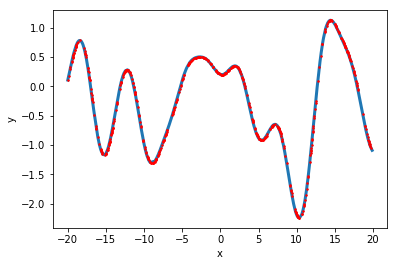

In [3]:
start=-20
end=20
num_pt=1000
length_scale_GP=2
train_ratio=0.5
x_train,y_train,x_test,y_test=MCDropoutOutil.generateData("MC","interpol",start,end,num_pt,length_scale_GP,N=int(train_ratio*num_pt),plot=True)

Parameters

In [4]:
device = torch.device("cpu") #"cuda" if args.cuda else 

batch_size=64
result_path="Regression1D_interpol/"
loss_file=result_path+"loss"
cuda=False

input_dim=1
nclasses=1
hidden_layers=[256,512,256]
p_drop=0.1


model=MCDropoutNetwork.DropoutNetwork(input_dim,nclasses,hidden_layers,p_drop)
optimizer=optim.Adam(model.parameters(),lr=1e-3)
criterion=nn.MSELoss()
n_epochs=1000


In [5]:
trainer=MCDropoutTrain.MCDropoutTrainer(device,x_train,
                                        y_train,optimizer,
                                        criterion,batch_size,n_epochs,
                                        model,normalize=False,
                                        result_path=result_path,loss_file=loss_file)

In [6]:
trainer.train(printInfo=True)

In [7]:
MCDropoutTestRegression.test(trainer,x_test,y_test)

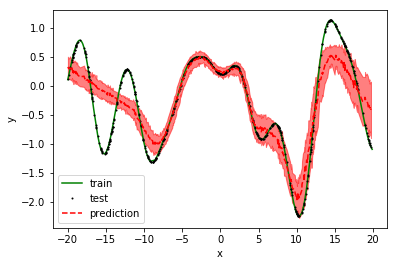

In [8]:
MCDropoutTestRegression.test_uncertainty(trainer,x_test,y_test,result_path+"interpol.pdf",x_train,y_train)